In [23]:
import cv2
import matplotlib.pyplot as plt
import math
import time

In [2]:
cv2.__version__

'3.4.1-dev'

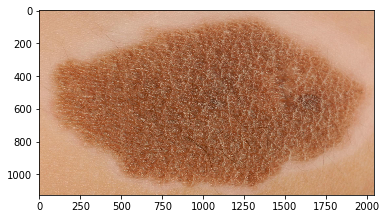

In [170]:
image = cv2.imread('naevus/132357.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

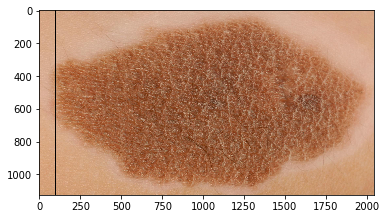

In [62]:
for x in range(image.shape[0]):
    image[x][100] = [0, 0, 0]

plt.imshow(image)

In [172]:
reference_pixel = image[1110][250]

In [73]:
t0 = time.time()
s = []
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel = image[y][x]
        rgb = [(int(reference_pixel[i])-int(pixel[i]))**2 for i in range(3)]
        distance = math.sqrt(sum(rgb))
        if distance < 13:
            s.append((y,x))
print(time.time() - t0)

11.292500972747803


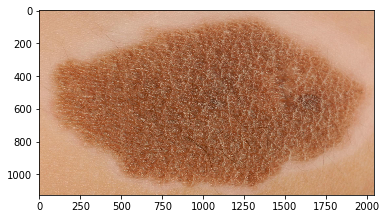

In [69]:
plt.imshow(image)

In [52]:
p2 = image[150, 150]
p1 = image[100, 100]
oi=[(int(p1[i])-int(p2[i]))**2 for i in range(3)]
sum(oi)

17

In [29]:
p2

array([212, 167, 134], dtype=uint8)

In [171]:
reference_pixel

array([0, 0, 0], dtype=uint8)

In [47]:
(p[0])

numpy.uint8

In [80]:
import numpy as np

def colorize(x):
    print(x)
    distance = [(int(reference_pixel[i])-int(x[i]))**2 for i in range(3)]
    distance = math.sqrt(sum(distance))
    return [255, 0, 0] if distance > 13 else x

colorize_vec = np.vectorize(colorize, otypes=[np.uint])

In [183]:
%%cython -a
import cython
import math

@cython.boundscheck(False)
cpdef unsigned char[:, :, :] colorize(unsigned char [:, :, :] image, unsigned char [:] refPixel, unsigned char [:] color):
    cdef int x, y, h, w, i
    cdef float distance
#     cdef unsigned char [:] color = [255, 0, 0]

    h = image.shape[0]
    w = image.shape[1]

    for x in range(0, h):
        for y in range(0, w):
            pixel = image[x][y]
            rgb = (refPixel[0]-pixel[0])**2
            rgb += (refPixel[1]-pixel[1])**2
            rgb += (refPixel[2]-pixel[2])**2
            distance = math.sqrt(rgb)
            if distance < 13:
                image[x, y] = color
    return image

In [184]:
t0 = time.time()
img = colorize(image, reference_pixel, np.array([255, 0, 0], dtype=np.uint8))
print(time.time() - t0)

5.618714809417725


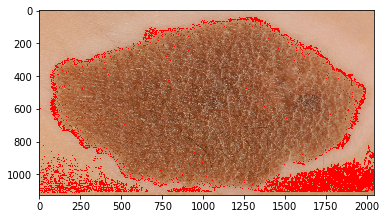

In [182]:
plt.imshow(image)

In [186]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [98]:
%%cython -a
 
def threshold_slow(T, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            image[y, x] = 255 if image[y, x] >= T else 0
            
    # return the thresholded image
    return image

In [190]:
%%cython -a

import cython
import math
import numpy as np

@cython.boundscheck(False)
cpdef unsigned char[:, :, :] colorize(unsigned char [:, :, :] image,
                                      unsigned char [:] refPixel,
                                      unsigned char [:] color):
    cdef int x, y, h, w
    cdef float distance
    h = image.shape[0]
    w = image.shape[1]

    for x in range(0, h):
        for y in range(0, w):
            pixel = image[x][y]
            rgb = (refPixel[0]-pixel[0])**2
            rgb += (refPixel[1]-pixel[1])**2
            rgb += (refPixel[2]-pixel[2])**2
            distance = math.sqrt(rgb)
            if distance < 13:
                image[x, y] = color

    return np.asarray(image)

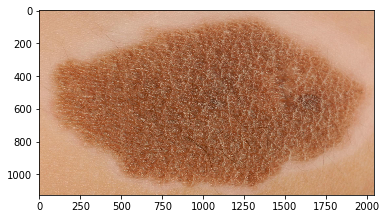

In [207]:
image = cv2.imread('naevus/132357.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

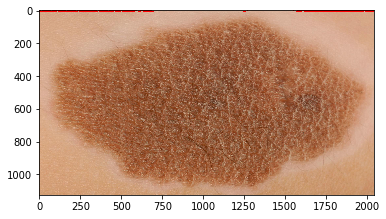

<MemoryView of 'ndarray' object>


In [208]:
refPixel = image[10, 10]
color = np.array([255, 0, 0], dtype=np.uint8)
img = colorize(image, refPixel, color)
plt.imshow(img)
plt.show()
print(img[10, 10])

In [202]:
i = np.asarray(img)
i[10, 10]

array([255,   0,   0], dtype=uint8)

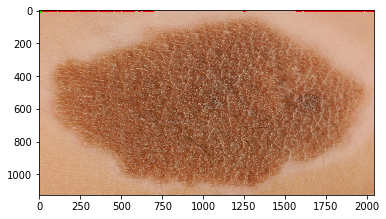

In [211]:
cv2.rectangle(np.asarray(img), (10, 10), (11, 11), (0, 255, 0), 15)
plt.imshow(img)

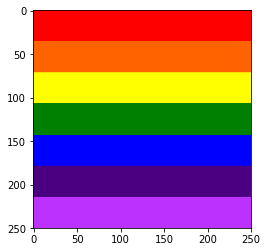

In [227]:
c = cv2.imread('../../computer_vision/Relatorio_1/rainbow.png')
c = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

[  0   0 255]


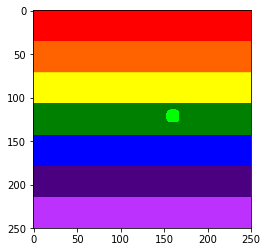

In [228]:
refPixel = c[160, 121]
print(refPixel)
cv2.rectangle(np.asarray(c), (160, 121), (160, 121), (0, 255, 0), 15)
plt.imshow(c)

In [222]:
print(c[110, 110])

[0 0 0]
